In [1]:
import numpy as np
import pandas as pd

# import plotnine
from plotnine import ggplot, aes, geom_line, geom_point, geom_errorbar, facet_wrap, position_dodge, theme

In [7]:
rf = pd.read_csv("claim_2_1_classification.csv")

,task,dataset,boot_iter,algorithm,scoring,n_trees,regularization,train_score,test_score,train_wall_time,test_wall_time,train_cpu_time,test_cpu_time,tunning_wall_time,tunning_cpu_time
0,classification,juvenile,0,RF,AUC,10,None,0.956552,0.653751,0.018786,0.004418,0.019005,0.004420,NaN,NaN
1,classification,juvenile,0,RF-MTRY,AUC,10,RandomForestClassifier(max_features=0.61547708...,0.961420,0.673008,0.098518,0.003668,0.578807,0.003668,3.002336,11.850908
2,classification,juvenile,0,RF-DEPTH,AUC,10,"RandomForestClassifier(max_depth=2, n_estimato...",0.574306,0.550244,0.033478,0.003736,0.367396,0.041061,1.441403,9.943574
3,classification,juvenile,0,HS-RF,AUC,10,0.1,0.965812,0.663117,0.048781,0.004143,0.048774,0.004144,0.695791,0.820744
4,classification,juvenile,0,BART,AUC,10,None,0.674609,0.645975,4.891415,7.729868,0.516231,7.729680,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3170,classification,haberman,4,RF,AUC,500,None,0.972222,0.588148,0.276577,0.051586,0.276573,0.051586,NaN,NaN
3171,classification,haberman,4,RF-MTRY,AUC,500,RandomForestClassifier(max_features=0.91477270...,0.972222,0.581481,0.311020,0.051179,0.976136,0.051197,13.845533,22.562783
3172,classification,haberman,4,RF-DEPTH,AUC,500,"RandomForestClassifier(max_depth=4, n_estimato...",0.675185,0.577778,0.287014,0.049088,0.858235,0.049088,13.728003,22.816727
3173,classification,haberman,4,HS-RF,AUC,500,25.0,0.740741,0.498519,0.629491,0.051471,0.629474,0.051472,10.048256,10.048240


train_score  \
task           dataset       algorithm scoring n_trees                
classification breast-cancer BART      AUC     10          0.604364   
                                               25          0.644228   
                                               50          0.641836   
                                               75          0.647569   
                                               100         0.655631   
...                                                             ...   
               juvenile      RF-MTRY   AUC     10          0.961420   
                                               25          0.995370   
                                               50          0.998457   
                                               75          1.000000   
                                               100         1.000000   

                                                        test_score  
task           dataset       algorithm scoring n_trees              
classification breast-cancer BART      AUC     10         0.575215  
                                               25         0.601948  
                                               50         0.619255  
                                               75         0.612281  
                                               100        0.612987  
...                                                            ...  
               juvenile      RF-MTRY   AUC     10         0.673008  
                                               25         0.699614  
                                               50         0.719020  
                                               75         0.677552  
                                               100        0.685803  

[235 rows x 2 columns]

/home/bro/anaconda3/envs/mlds/lib/python3.10/site-packages/plotnine/facets/facet.py:446: PlotnineWarning: If you need more space for the y-axis tick text use ... + theme(subplots_adjust={'hspace': 0.25}). Choose an appropriate value for 'hspace'
/home/bro/anaconda3/envs/mlds/lib/python3.10/site-packages/plotnine/layer.py:411: PlotnineWarning: geom_errorbar : Removed 25 rows containing missing values.


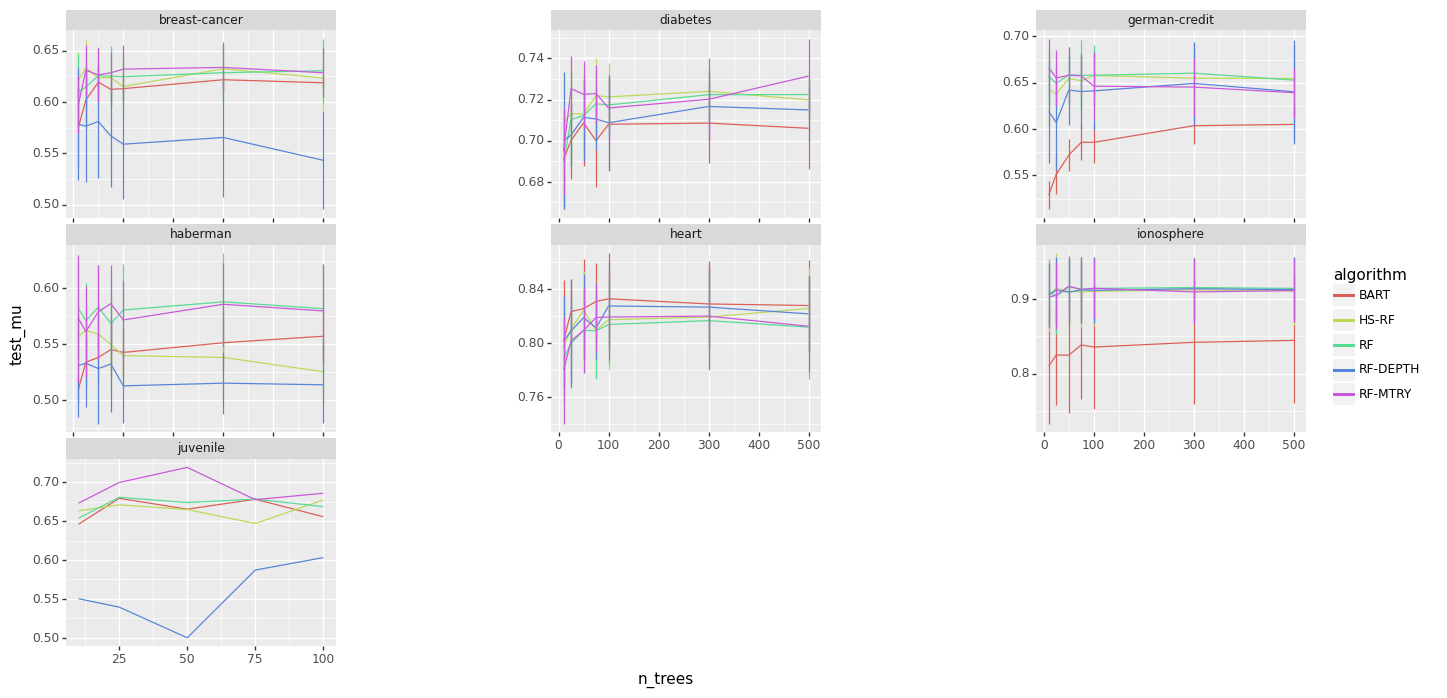

<ggplot: (8766183274791)>

In [11]:
def plot_fig_4D(res):
    res = res.copy()
    res_group = res.drop(["regularization", "boot_iter", "train_wall_time", "test_wall_time", "train_cpu_time", "test_cpu_time", "tunning_wall_time", "tunning_cpu_time"], axis = 1).groupby(["task", "dataset", "algorithm", "scoring", "n_trees"])
    res_mu = res_group.mean()
    res_mu
    res_mu.columns = ["train_mu", "test_mu"]
    res_std = res_group.std()
    res_std.columns = ["train_std", "test_std"]
    res = res_mu.join(res_std)
    res["test_min"] = res["test_mu"] - res["test_std"]
    res["test_max"] = res["test_mu"] + res["test_std"]
    res["train_min"] = res["train_mu"] - res["train_std"]
    res["train_max"] = res["train_mu"] + res["train_std"]
    res = res.reset_index()

    g = (ggplot(res, aes(x="n_trees", y="test_mu", color="algorithm")) + 
    geom_line() +
    geom_errorbar(aes(ymin="test_min", ymax="test_max"), width=.2,
                 position=position_dodge(0.05)) +
    facet_wrap("dataset", scales="free") +
    theme(subplots_adjust={'wspace':0.8}) +
    theme(figure_size=(16, 8))
    )

    display(g)

plot_fig_4D(rf)